## Model 1: Random Forest

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
label_cut = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
data = pd.read_csv("./Input/train.csv")

In [3]:
# limpiamos dataset y entrenamos modelo

le = preprocessing.LabelEncoder()
data["cut"] = le.fit_transform(data["cut"])
data["color"] = le.fit_transform(data["color"])
data["clarity"] = le.fit_transform(data["clarity"])

In [4]:
pipeline = [
    StandardScaler(),
    Normalizer(),
    ]
tr = make_pipeline(*pipeline)

Xpr = tr.fit_transform(data)
Xpr = pd.DataFrame(Xpr,columns=data.columns)
data = data.drop(["id"], axis=1)

In [5]:
columnas = [a for a in data.columns if a not in ["price"]]
X = data[columnas]
y = data["price"]
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.2)
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,2,5,62.8,56.0,4.29,4.31,2.70,605
1,0.34,2,1,2,62.6,55.0,4.46,4.49,2.80,565
2,0.40,4,0,2,60.3,62.0,4.70,4.75,2.85,720
3,0.40,3,4,4,61.8,59.2,4.72,4.74,2.92,793
4,0.90,4,0,2,61.0,63.0,6.10,6.13,3.73,4381
...,...,...,...,...,...,...,...,...,...,...
40450,0.32,2,0,4,61.5,56.0,4.41,4.43,2.72,862
40451,0.30,2,0,5,60.9,57.0,4.32,4.35,2.64,710
40452,0.47,3,3,2,62.7,58.0,4.97,4.99,3.12,931
40453,0.40,1,3,5,63.5,56.0,4.68,4.70,2.98,807


from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
est = HistGradientBoostingRegressor().fit(X, y)
est.score(X, y)

In [15]:
#X, y = make_regression(n_features=9)
regr = RandomForestRegressor(bootstrap=True, max_depth= 100,max_features= 3, min_samples_leaf=3,min_samples_split=8,n_estimators=1000)
regr.fit(X, y)
y_pred = regr.predict(X_test)

print('R2:', metrics.r2_score(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R2: 0.9878032300571219
Root Mean Squared Error: 438.7055432991552


In [24]:
data_predict = pd.read_csv("./Input/predict.csv")


In [25]:
le = preprocessing.LabelEncoder()
data_predict["cut"] = le.fit_transform(data_predict["cut"])
data_predict["color"] = le.fit_transform(data_predict["color"])
data_predict["clarity"] = le.fit_transform(data_predict["clarity"])

In [26]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
pipeline = [
    StandardScaler(),
    Normalizer(),
    ]

tr = make_pipeline(*pipeline)

Xpr = tr.fit_transform(data_predict)
Xpr = pd.DataFrame(Xpr,columns=data_predict.columns)

In [27]:
data_predict = data_predict.drop(["id"], axis=1)

In [28]:
y_pred_2 = regr.predict(data_predict)
indices = np.array(range(len(y_pred_2)))

result = pd.DataFrame({"id": indices, "price":y_pred_2})
result

,id,price
0,0,15340.070783
1,1,15694.607688
2,2,1036.632878
3,3,454.906076
4,4,3532.411156
...,...,...
13480,13480,2487.927376
13481,13481,5065.678057
13482,13482,2882.445780
13483,13483,1042.467811


In [29]:
resultado = result.to_csv('Output/resultados.csv',index=False)

## Representación gráfica

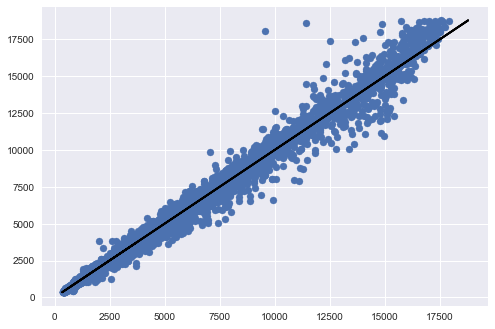

In [35]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.plot(y_test,y_test, color='black', linewidth=2)
plt.show()
plt.style.use('bmh')
